In [18]:
# Import required libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import mplfinance as mpf
%matplotlib widget

import warnings
warnings.filterwarnings('ignore')

In [19]:
df_btc_hourly= pd.read_csv('BTC-Hourly.csv')
df_btc_daily= pd.read_csv('BTC-Daily.csv')

In [20]:
df = df_btc_daily

In [21]:
# Get data only from the last year

df['date'] = pd.to_datetime(df['date'])

# Find the maximum date in your dataset
max_date = df['date'].max()

# Calculate the date one year back from the maximum date
one_year_ago = max_date - pd.DateOffset(years=1)

# Filter the dataset to include only the last year of data
df = df[df['date'] > one_year_ago]

### Candlestick Price Movement Chart

- For a green (bullish) candle, the bottom of the body represents the open price, and the top of the body represents the close price for that day. The wicks extending from the body show the high and low prices for the day.
- For a red (bearish) candle, the top of the body is the open price, and the bottom of the body is the close price for that day.
- The highest price achieved during the time frame. This is represented by the top of the candle's wick or shadow, which is the thin line that extends from the body.
- The lowest price achieved during the time frame. This is represented by the bottom of the candle's wick or shadow.

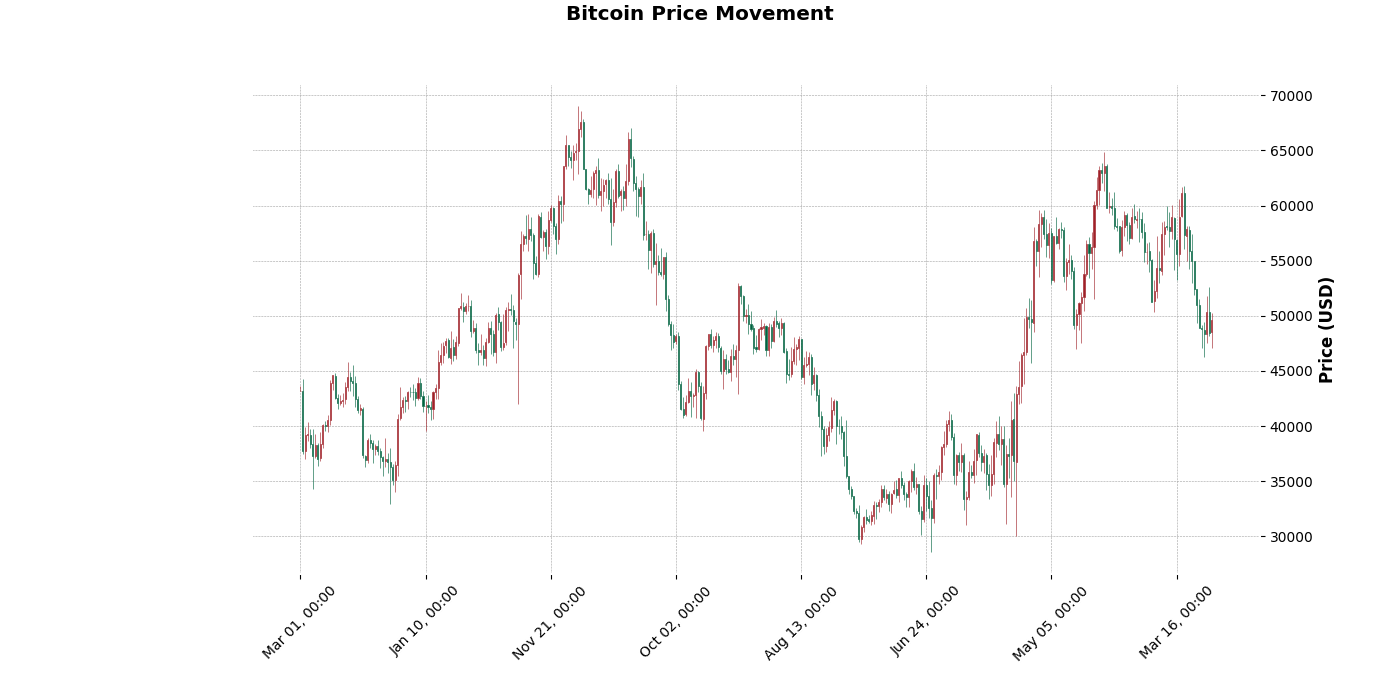

In [22]:
df_mplf = df.copy() 
df_mplf['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index
df_mplf.set_index('date', inplace=True)

# Rename columns to match mplfinance requirements, if necessary
df_mplf.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'Volume BTC': 'Volume'}, inplace=True)


# Configure and display the candlestick chart
mpf.plot(df_mplf, type='candle', style='charles',
         title='Bitcoin Price Movement',
         ylabel='Price (USD)',
         figsize=(14, 7))

## Volatility

Volatility represents the degree of variation of a trading price series over time, usually measured by the standard deviation of logarithmic returns. In simpler terms, it's a measure of how much the price of an asset varies over a certain period. High volatility means the price of the asset can change dramatically over a short time period in either direction. Low volatility means that the price does not fluctuate dramatically, but changes in value at a steady pace over a period of time.

- **Why is it important?** Volatility is crucial for traders because it provides insight into the potential risk and return. Higher volatility often means higher risk, but also the possibility for higher rewards.

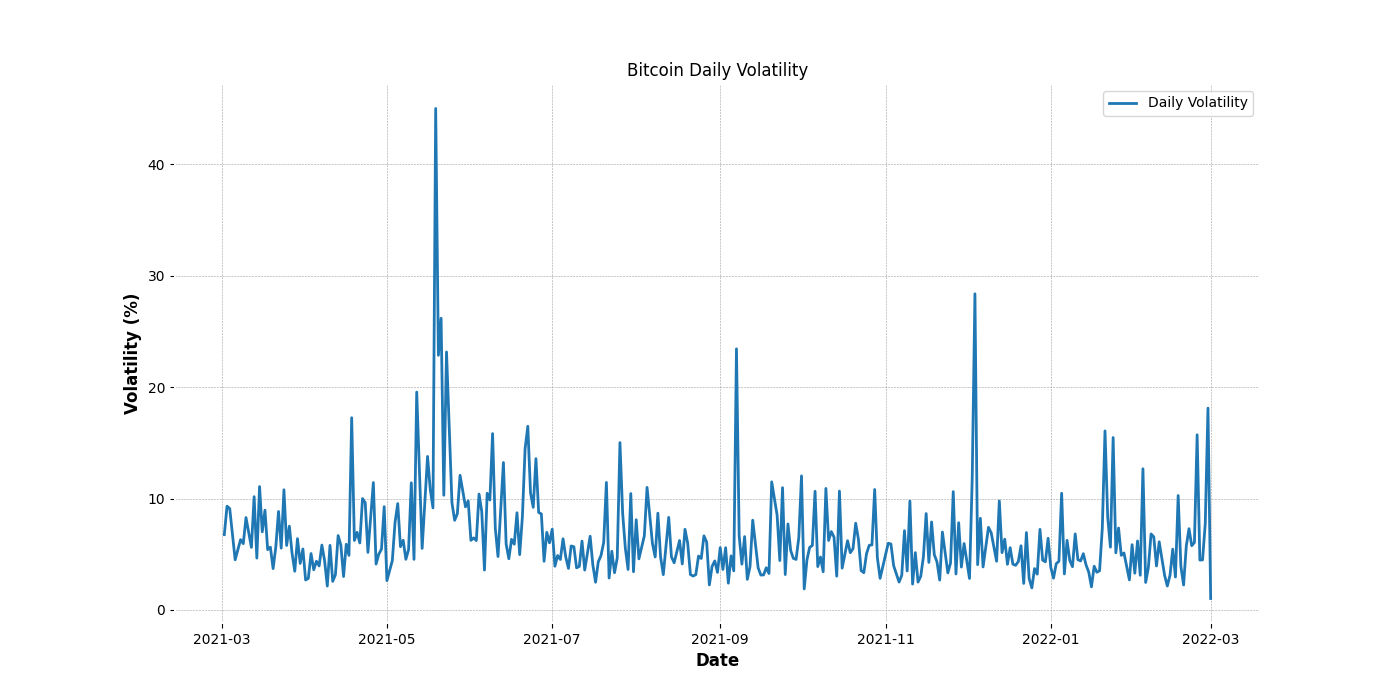

In [23]:
df['daily_volatility'] = (df['high'] - df['low']) / df['low'] * 100

plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['daily_volatility'], label='Daily Volatility')
plt.title('Bitcoin Daily Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.show()

## Volume Analysis

Volume represents the total amount of trading activity or contracts traded in a specified period. It can be analyzed for any type of asset but is particularly used in the stock market, forex trading, and cryptocurrency markets.

- **Why is it important?** Volume is an indicator of the strength or intensity behind a price trend. An asset's price movement up with high volume is seen as stronger and more likely to persist than a price movement with low volume. Therefore, traders often look for volume spikes as signals for entry or exit points.

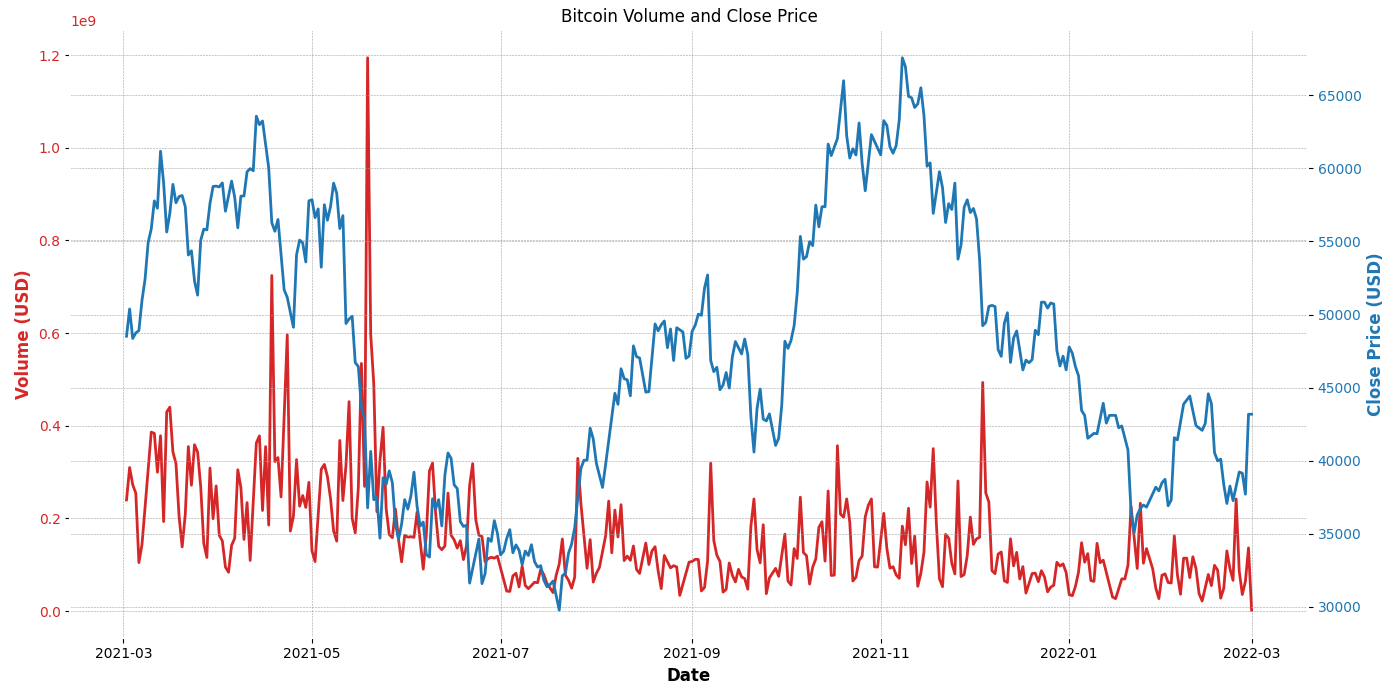

In [24]:
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume (USD)', color=color)
ax1.plot(df['date'], df['Volume USD'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Close Price (USD)', color=color)
ax2.plot(df['date'], df['close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Bitcoin Volume and Close Price')
plt.show()


## Moving Average

Moving Average (MA) is a crucial indicator used to smooth out price data over a specified period of time. It's a type of lagging indicator, meaning it's based on past prices. The moving average provides a clear view of the underlying trend by averaging the price data, thus filtering out the noise from random short-term fluctuations.

1. Simple Moving Average (SMA): Calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range. For example, a 50-day SMA would sum up the closing prices for the last 50 days and divide by 50.

2. Exponential Moving Average (EMA): Similar to the SMA, but gives more weight to recent prices, making it more responsive to new information. This is achieved through a smoothing factor that places a higher weight on recent data points.

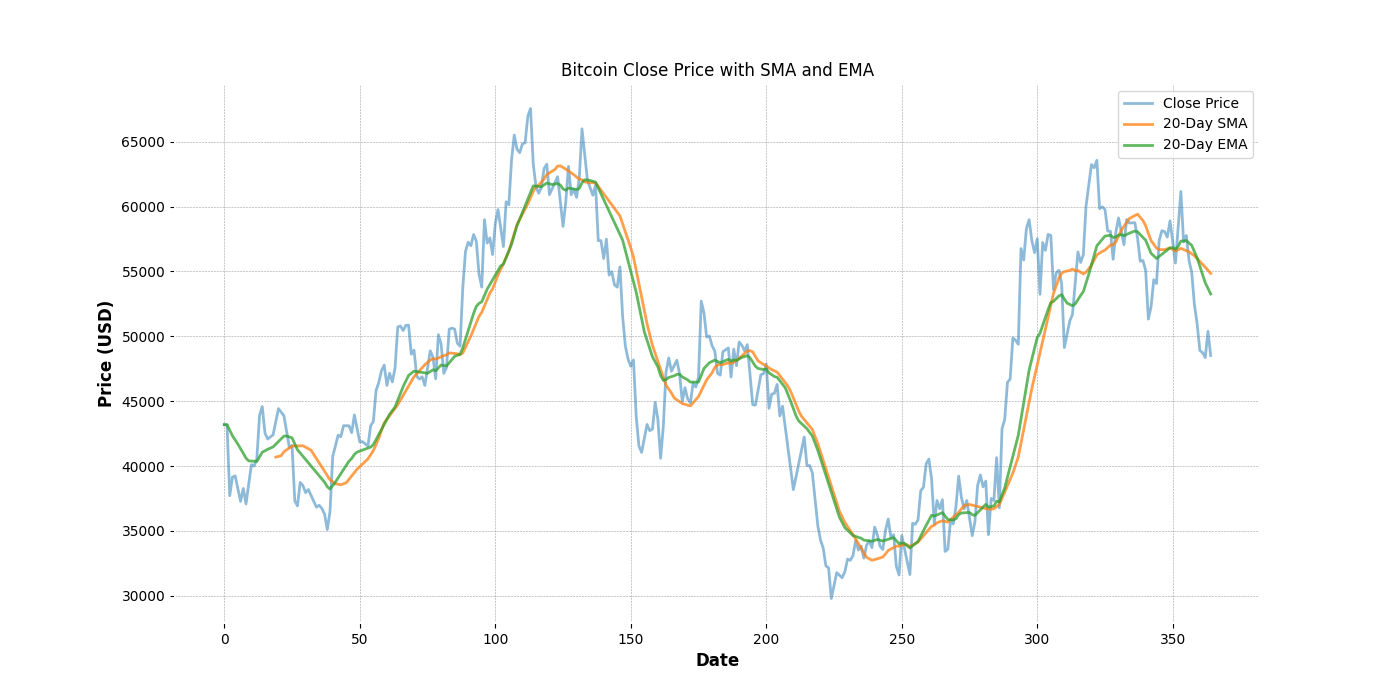

In [27]:
# Calculate a 20-day Simple Moving Average (SMA)
df['SMA_20'] = df['close'].rolling(window=20).mean()

# Calculate a 20-day Exponential Moving Average (EMA)
df['EMA_20'] = df['close'].ewm(span=20, adjust=False).mean()

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', alpha=0.5)
plt.plot(df.index, df['SMA_20'], label='20-Day SMA', alpha=0.75)
plt.plot(df.index, df['EMA_20'], label='20-Day EMA', alpha=0.75)

plt.title('Bitcoin Close Price with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [28]:
# Define the moving averages as a dictionary for mplfinance
mpf_sma = mpf.make_addplot(df['SMA_20'], color='blue')
mpf_ema = mpf.make_addplot(df['EMA_20'], color='orange')

# Plotting using mplfinance with moving averages
mpf.plot(df, type='ohlc', figsize=(14, 7), style='charles',
         title='Bitcoin Close Price with SMA and EMA',
         ylabel='Price (USD)',
         addplot=[mpf_sma, mpf_ema])


TypeError: Expect data.index as DatetimeIndex

## Relative Strength Index (RSI)

The RSI is a momentum oscillator that measures the speed and change of price movements. It oscillates between 0 and 100 and is typically used to identify overbought or oversold conditions in a market. The RSI is calculated based on the average gains and losses of an asset over a specified period, traditionally 14 days.

- **Overbought Condition:** An RSI above 70 is considered overbought. This condition suggests that the asset may be getting overvalued and could be ready for a pullback or reversal in price.

- **Oversold Condition:** An RSI below 30 is considered oversold. This condition suggests that the asset may be undervalued and possibly due for a price correction to the upside.

- **RSI Calculation:** Without going into the detailed math, the RSI calculation involves first calculating the average price gains and losses over the last 14 periods (days, hours, etc.). Then, these averages are plugged into a formula that normalizes the result to a value between 0 and 100.

### Simplified RSI Calculation Formula:

1. Calculate the average gain and average loss over the past 14 periods.
2. Compute the relative strength (RS) which is the ratio of average gain to average loss.
3. The RSI is then calculated using the formula: RSI = 100 - (100 / (1 + RS)).

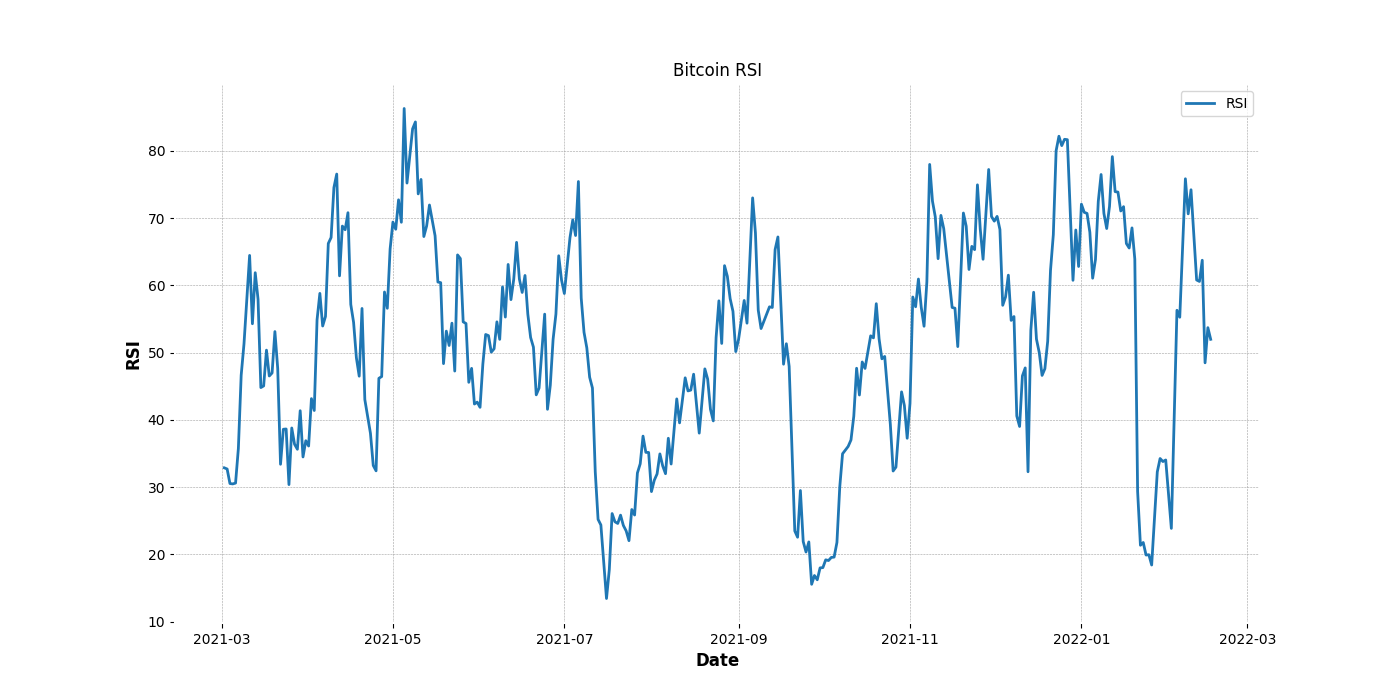

In [ ]:
delta = df['close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['RSI'], label='RSI')
plt.title('Bitcoin RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()
